<a href="https://colab.research.google.com/github/geoafrikana/geo-datascience/blob/main/geo_datastructures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook explores the three major data structures used for representing geography in Python; Rasters (aka Surfaces), GeoDataFrames and Graphs.

The raster data structure was explored using the xarray and rioxarray libraries.
GeoDataFrames was explored using the GeoPandas library.
Finally, graph datastructure was explored using the osmnx library.

In [1]:
!pip install geopandas contextily osmnx xarray datashader rioxarray shapely pysal -q

     |████████████████████████████████| 1.0 MB 4.9 MB/s 
     |████████████████████████████████| 95 kB 5.3 MB/s 
     |████████████████████████████████| 18.2 MB 725 kB/s 
     |████████████████████████████████| 47 kB 3.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.3 MB 34.0 MB/s 
     |████████████████████████████████| 16.7 MB 352 kB/s 
     |████████████████████████████████| 19.3 MB 44.6 MB/s 
     |████████████████████████████████| 1.0 MB 40.6 MB/s 
     |████████████████████████████████| 11.2 MB 38.3 MB/s 
     |████████████████████████████████| 62 kB 972 kB/s 
     |████████████████████████████████| 944 kB 30.3 MB/s 
     |████████████████████████████████| 76 kB 4.5 MB/s 
     |████████████████████████████████| 837 kB 43.8 MB/s 
     |████████████████████████████████| 140 kB 49.0 MB/s 
     |████████████████████████████████| 830 kB 39.8 MB/s 
     |█████

The cell below unistalls the default matplotlib version.

Then installs the most recent stable version of matplotlib.

Not running the cell could result in `cannot import name '_png' from 'matplotlib'` error.



In [37]:
!pip uninstall matplotlib
!pip install -U matplotlib

Found existing installation: matplotlib 3.5.2
Uninstalling matplotlib-3.5.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
ERROR: pip's dependency resolver does not currently take in

In [2]:
import numpy, pandas, osmnx, geopandas, rioxarray, xarray, datashader, requests, contextily as cx, seaborn
from shapely import geometry
import matplotlib.pyplot as plt
from pysal.lib import cg

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [52]:
countries_cleaned_url = 'https://geographicdata.science/book/_downloads/aa6db374135e277124917938efb06371/countries_clean.gpkg'
tokyo_cleaned_url = 'https://geographicdata.science/book/_downloads/7fb86b605af15b3c9cbd9bfcbead23e9/tokyo_clean.csv'
sao_paolo_url = 'https://geographicdata.science/book/_downloads/5263090bd0bdbd7d1635505ff7d36d04/ghsl_sao_paulo.tif'
san_diego_url = 'https://geographicdata.science/book/_downloads/f2341ee89163afe06b42fc5d5ed38060/sandiego_tracts.gpkg'
nasa_dem_url = 'https://geographicdata.science/book/_downloads/9287b38e4d53d9d500df367d8e678465/nasadem_sd.tif'
urls = [{'url':countries_cleaned_url, 'name':'countries_clean.gpkg'},
        {'url':tokyo_cleaned_url, 'name':'tokyo_clean.csv'},
        {'url':sao_paolo_url, 'name':'sao_paolo.tif'},
        {'url':san_diego_url, 'name':'sao_diego.gpkg'},
        {'url':nasa_dem_url, 'name':'nasa_dem.tif'}
]

In [53]:
def down(url, name):
  r = requests.get(url, allow_redirects=True)
  open(name, 'wb').write(r.content)

In [54]:
for uri in urls:
  down(uri['url'], uri['name'])

In [6]:
gt_polygons = geopandas.read_file('/content/countries_clean.gpkg')
# /content/countries_cleaned.gpkg

In [7]:
gt_polygons['centroid'] = gt_polygons.centroid

In [8]:
gt_polygons.head()

,ADMIN,geometry,centroid
0,Indonesia,"MULTIPOLYGON (((13102705.696 463877.598, 13102...",POINT (13055431.810 -248921.141)
1,Malaysia,"MULTIPOLYGON (((13102705.696 463877.598, 13101...",POINT (12211696.493 422897.505)
2,Chile,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",POINT (-7959811.948 -4915458.802)
3,Bolivia,"POLYGON ((-7737827.685 -1979875.500, -7737828....",POINT (-7200010.945 -1894653.148)
4,Peru,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",POINT (-8277554.831 -1032942.536)


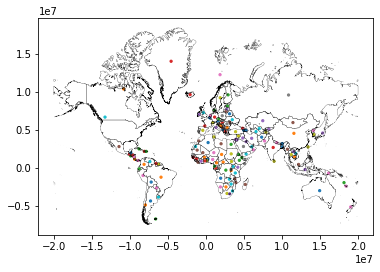

In [9]:
ax = gt_polygons.set_geometry(
    'centroid'
).plot('ADMIN', markersize=5)

gt_polygons.plot(
    'ADMIN', 
    ax=ax, 
    facecolor='none', 
    edgecolor='k', 
    linewidth=.2
);

<AxesSubplot:>

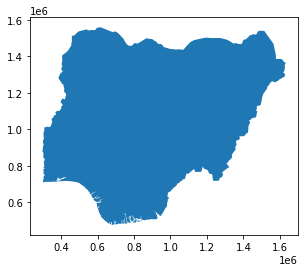

In [10]:
gt_polygons.query('ADMIN == "Nigeria"').plot()

<AxesSubplot:>

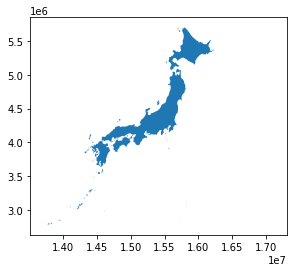

In [11]:
gt_polygons[gt_polygons.ADMIN.str.contains('Jap')].plot()

# Question
How many islands are in Indonesia?

In [12]:
# first we extract indonesia from the countries dataframe
indonesia = gt_polygons[gt_polygons.ADMIN.str.contains('Indo')]

In [13]:
# Next we inspect the geometry and attributes of indonesia.
indonesia

,ADMIN,geometry,centroid
0,Indonesia,"MULTIPOLYGON (((13102705.696 463877.598, 13102...",POINT (13055431.810 -248921.141)


We can see that the geometry of indonesia is something called Multipolygon.

What is a multipolygon?
A multipolygon is a single object that has multiple parts. As you can see below, indonesia is a single country but geographically, it consists of many unconnected land masses.

<AxesSubplot:>

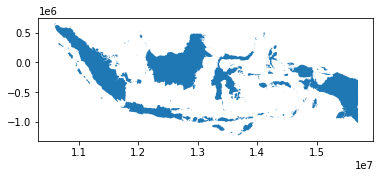

In [14]:
indonesia.plot()

Next, we need to break indonesia to its various islands.

Geopandas gives us the `explode` function to do this.

In [15]:
indonesia_islands = indonesia.explode()
indonesia_islands

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  """Entry point for launching an IPython kernel.


ADMIN                          centroid  \
0 0    Indonesia  POINT (13055431.810 -248921.141)   
  1    Indonesia  POINT (13055431.810 -248921.141)   
  2    Indonesia  POINT (13055431.810 -248921.141)   
  3    Indonesia  POINT (13055431.810 -248921.141)   
  4    Indonesia  POINT (13055431.810 -248921.141)   
...          ...                               ...   
  259  Indonesia  POINT (13055431.810 -248921.141)   
  260  Indonesia  POINT (13055431.810 -248921.141)   
  261  Indonesia  POINT (13055431.810 -248921.141)   
  262  Indonesia  POINT (13055431.810 -248921.141)   
  263  Indonesia  POINT (13055431.810 -248921.141)   

                                                geometry  
0 0    POLYGON ((13102705.696 463877.598, 13102705.69...  
  1    POLYGON ((13853769.790 -1026334.816, 13855472....  
  2    POLYGON ((13087515.192 463457.874, 13087506.13...  
  3    POLYGON ((15693204.793 -289587.838, 15693206.7...  
  4    POLYGON ((12623095.133 -943744.645, 12624309.0...  
...                                                  ...  
  259  POLYGON ((10970268.273 17736.181, 10974994.068...  
  260  POLYGON ((11657918.548 83454.212, 11659712.270...  
  261  POLYGON ((11650634.949 94167.759, 11651006.376...  
  262  POLYGON ((13934106.805 200321.302, 13934596.00...  
  263  POLYGON ((14152089.356 532099.941, 14153067.75...  

[264 rows x 3 columns]

Our output has 264 rows. Each row represents an island. So indonesia has 264 islands.

Also, note that the geometry type in the new dataframe is now Polygon not Multipolygon.

In [16]:
r = requests.get(tokyo_cleaned_url, allow_redirects=True)
open('tokyo_clean.csv', 'wb').write(r.content)

1499522

In [17]:
tokyo = pandas.read_csv('/content/tokyo_clean.csv')

In [18]:
tokyo.head()

,user_id,longitude,latitude,date_taken,photo/video_page_url,x,y
0,10727420@N00,139.700499,35.674000,2010-04-09 17:26:25.0,http://www.flickr.com/photos/10727420@N00/4545...,1.555139e+07,4.255856e+06
1,8819274@N04,139.766521,35.709095,2007-02-10 16:08:40.0,http://www.flickr.com/photos/8819274@N04/26503...,1.555874e+07,4.260667e+06
2,62068690@N00,139.765632,35.694482,2008-12-21 15:45:31.0,http://www.flickr.com/photos/62068690@N00/3125...,1.555864e+07,4.258664e+06
3,49503094041@N01,139.784391,35.548589,2011-11-11 05:48:54.0,http://www.flickr.com/photos/49503094041@N01/6...,1.556073e+07,4.238684e+06
4,40443199@N00,139.768753,35.671521,2006-04-06 16:42:49.0,http://www.flickr.com/photos/40443199@N00/2482...,1.555899e+07,4.255517e+06


In [19]:
tokyo_geoms = geopandas.points_from_xy(
    x=tokyo["longitude"],
    y=tokyo["latitude"],
    # x,y are Earth longitude & latitude
    crs="EPSG:4326"
)

In [20]:
tokyo = geopandas.GeoDataFrame(tokyo, geometry=tokyo_geoms)

In [21]:
tokyo.head()

,user_id,longitude,latitude,date_taken,photo/video_page_url,x,y,geometry
0,10727420@N00,139.700499,35.674000,2010-04-09 17:26:25.0,http://www.flickr.com/photos/10727420@N00/4545...,1.555139e+07,4.255856e+06,POINT (139.70050 35.67400)
1,8819274@N04,139.766521,35.709095,2007-02-10 16:08:40.0,http://www.flickr.com/photos/8819274@N04/26503...,1.555874e+07,4.260667e+06,POINT (139.76652 35.70909)
2,62068690@N00,139.765632,35.694482,2008-12-21 15:45:31.0,http://www.flickr.com/photos/62068690@N00/3125...,1.555864e+07,4.258664e+06,POINT (139.76563 35.69448)
3,49503094041@N01,139.784391,35.548589,2011-11-11 05:48:54.0,http://www.flickr.com/photos/49503094041@N01/6...,1.556073e+07,4.238684e+06,POINT (139.78439 35.54859)
4,40443199@N00,139.768753,35.671521,2006-04-06 16:42:49.0,http://www.flickr.com/photos/40443199@N00/2482...,1.555899e+07,4.255517e+06,POINT (139.76875 35.67152)


In [22]:
down(sao_paolo_url, 'ghsl_sao_paulo.tif')

In [23]:
pop = xarray.open_rasterio('/content/ghsl_sao_paulo.tif')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  """Entry point for launching an IPython kernel.


In [24]:
type(pop)

xarray.core.dataarray.DataArray

In [25]:
pop.coords

Coordinates:
  * band     (band) int64 1
  * y        (y) float64 -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
  * x        (x) float64 -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06

In [26]:
pop.attrs

{'AREA_OR_POINT': 'Area',
 'crs': '+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs=True',
 'grid_mapping': 'spatial_ref',
 'is_tiled': 0,
 'nodatavals': (-200.0,),
 'offsets': (0.0,),
 'res': (250.0, 250.0),
 'scales': (1.0,),
 'transform': (250.0, 0.0, -4482000.0, 0.0, -250.0, -2822000.0)}

In [27]:
pop.shape

(1, 416, 468)

In [28]:
pop.sel(band=1)

<xarray.DataArray (y: 416, x: 468)>
[194688 values with dtype=float32]
Coordinates:
    band     int64 1
  * y        (y) float64 -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
  * x        (x) float64 -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06
Attributes:
    transform:      (250.0, 0.0, -4482000.0, 0.0, -250.0, -2822000.0)
    crs:            +proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +...
    res:            (250.0, 250.0)
    is_tiled:       0
    nodatavals:     (-200.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    grid_mapping:   spatial_ref

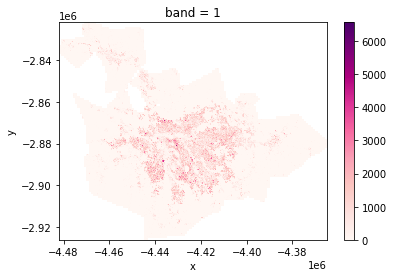

In [29]:
pop.where(pop >= 0).plot(cmap="RdPu");

In [30]:
graph = osmnx.graph_from_point((7.775813263762137, 4.545583580644855), dist=200)

In [31]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

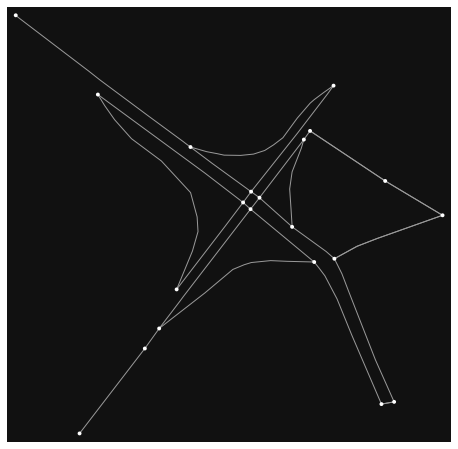

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [32]:
osmnx.plot_graph(graph)

In [33]:
len(graph.nodes)

21

In [34]:
graph.edges

OutMultiEdgeView([(1827414724, 1964870793, 0), (1827414724, 5235822312, 0), (1964870787, 3391605665, 0), (1964870787, 5235822300, 0), (1964870793, 3343875225, 0), (1964870793, 3391589652, 0), (2295273220, 3391589633, 0), (2295273220, 1964870787, 0), (3343875225, 5235822313, 0), (3343875225, 3391605657, 0), (3391589633, 2295273220, 0), (3391589639, 3391589640, 0), (3391589640, 6649094911, 0), (3391589646, 3391589652, 0), (3391589646, 1964870793, 0), (3391605657, 5235822305, 0), (3391605657, 1827414724, 0), (3391605664, 3391605666, 0), (3391605665, 3391605666, 0), (3391605665, 1964870787, 0), (3391605666, 3391605665, 0), (3391605666, 3391605664, 0), (5235822300, 3391605657, 0), (5235822300, 5235822305, 0), (5235822305, 3391605664, 0), (5235822312, 9550975988, 0), (5235822313, 3391589633, 0), (6649094911, 5235822313, 0), (6649094911, 3343875225, 0), (6649094919, 1827414724, 0), (6649094919, 5235822312, 0)])

In [35]:
graph.nodes[1964870787]

{'street_count': 3, 'x': 4.5462598, 'y': 7.7754342}

# Converting a graph to a GeoDataFrame

OSMNX provides the graph_to_gdfs function for converting a graph to dataframes.

The function returns a tuple of two dataframes; nodes and edges.

https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.graph

In [36]:
osogbo_nodes, osogbo_edges = osmnx.graph_to_gdfs(graph)

In [37]:
osogbo_edges.head()

osmid  oneway lanes                   name  \
u          v          key                                                   
1827414724 1964870793 0    545377792    True     2  Gbongan - Osogbo Road   
           5235822312 0    546530325    True   NaN                    NaN   
1964870787 3391605665 0    185797197   False   NaN                    NaN   
           5235822300 0    545170397    True   NaN                    NaN   
1964870793 3343875225 0    545170390    True   NaN                    NaN   

                            highway  length  \
u          v          key                     
1827414724 1964870793 0     primary  11.506   
           5235822312 0     primary  64.411   
1964870787 3391605665 0    tertiary  99.952   
           5235822300 0     primary  45.323   
1964870793 3343875225 0     primary   8.580   

                                                                    geometry  \
u          v          key                                                      
1827414724 1964870793 0        LINESTRING (4.54561 7.77595, 4.54555 7.77587)   
           5235822312 0    LINESTRING (4.54561 7.77595, 4.54531 7.77617, ...   
1964870787 3391605665 0    LINESTRING (4.54626 7.77543, 4.54644 7.77553, ...   
           5235822300 0    LINESTRING (4.54626 7.77543, 4.54620 7.77549, ...   
1964870793 3343875225 0        LINESTRING (4.54555 7.77587, 4.54561 7.77582)   

                          bridge  
u          v          key         
1827414724 1964870793 0      NaN  
           5235822312 0      NaN  
1964870787 3391605665 0      NaN  
           5235822300 0      NaN  
1964870793 3343875225 0      NaN

In [38]:
import networkx as nx

In [39]:
for x in nx.to_edgelist(graph):
  print(x)
  break

(1827414724, 1964870793, {'osmid': 545377792, 'oneway': True, 'lanes': '2', 'name': 'Gbongan - Osogbo Road', 'highway': 'primary', 'length': 11.506})


In [40]:
graph.nodes[5235822312]

{'street_count': 3, 'x': 4.5451419, 'y': 7.7762938}

In [41]:
osogbo_nodes.loc[1964870793]

y                                  7.775867
x                                  4.545551
highway                                 NaN
street_count                              4
geometry        POINT (4.5455506 7.7758672)
Name: 1964870793, dtype: object

(4.545, 4.546, 7.7755, 7.7765)

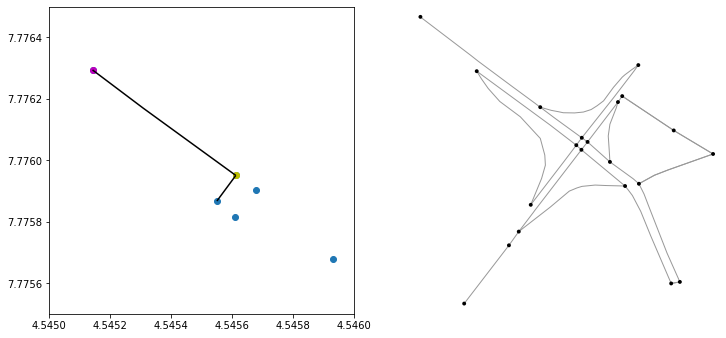

In [42]:
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 10));
osogbo_nodes.plot(ax=ax1) #all nodes
geopandas.GeoSeries(osogbo_nodes.loc[1827414724, 'geometry'], crs=osogbo_nodes.crs).plot(ax=ax1, color= 'y') #first node
ax2 = osmnx.plot_graph(graph, ax=ax2, node_color='k', close=False, show=False, save=False) # graph ax2
osogbo_edges.loc[1827414724].plot(ax=ax1, color='k') #line/edge
geopandas.GeoSeries(osogbo_nodes.loc[5235822312, 'geometry'], crs=osogbo_nodes.crs).plot(ax=ax1, color='m') # second node
ax1.axis([4.54500, 4.5460, 7.7755, 7.7765])


In [43]:
graph.nodes[1827414724]

{'highway': 'traffic_signals',
 'street_count': 4,
 'x': 4.5456127,
 'y': 7.7759504}

# Can you answer the following queries?

What neighborhood (or neighborhoods) have the the highest average elevation?

What neighborhood (or neighborhoods) have the highest point single point?

Can you find the neighborhood (or neighborhoods) with the largest elevation change?

In [55]:
sd_df = geopandas.read_file('/content/san_diego.gpkg')
sd_df.shape, sd_df.columns

((628, 25),
 Index(['GEOID', 'median_age', 'total_pop', 'total_pop_white', 'tt_work',
        'hh_total', 'hh_female', 'total_bachelor', 'median_hh_income',
        'income_gini', 'total_housing_units', 'total_rented', 'median_no_rooms',
        'median_house_value', 'NAME', 'state', 'county', 'tract', 'area_sqm',
        'pct_rented', 'pct_hh_female', 'pct_bachelor', 'pct_white', 'sub_30',
        'geometry'],
       dtype='object'))

In [50]:
sd_df.head(2)

,GEOID,median_age,total_pop,total_pop_white,tt_work,hh_total,hh_female,total_bachelor,median_hh_income,income_gini,...,state,county,tract,area_sqm,pct_rented,pct_hh_female,pct_bachelor,pct_white,sub_30,geometry
0,06073018300,37.1,2590.0,2375.0,1299.0,2590.0,137.0,0.0,62500.0,0.5355,...,06,073,018300,2.876449,0.373913,0.052896,0.000000,0.916988,False,"POLYGON ((-13069450.120 3922380.770, -13069175..."
1,06073018601,41.2,5147.0,4069.0,1970.0,5147.0,562.0,24.0,88165.0,0.4265,...,06,073,018601,4.548797,0.205144,0.109190,0.004663,0.790558,False,"POLYGON ((-13067719.770 3922939.420, -13067631..."


<AxesSubplot:>

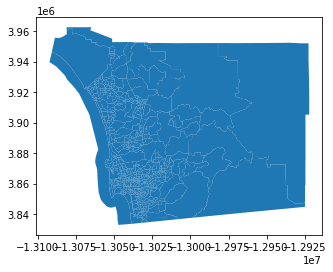

In [60]:
sd_df.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  """Entry point for launching an IPython kernel.


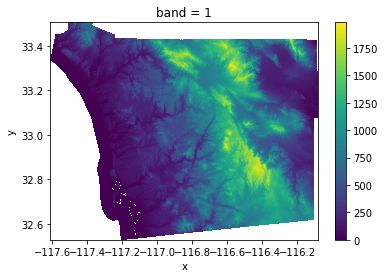

In [59]:
nasa_dem = xarray.open_rasterio('/content/nasa_dem.tif').sel(band=1)
nasa_dem.where(nasa_dem>=0).plot.imshow()

In [61]:
from rasterstats import zonal_stats

In [75]:
elevations2 = zonal_stats(
    sd_df.to_crs(nasa_dem.rio.crs),   # Geotable with zones
    '/content/nasa_dem.tif' # Path to surface file
)
elevations2 = pandas.DataFrame(elevations2)
elevations2.head()

,min,max,mean,count
0,-12.0,18.0,3.538397,3594
1,-2.0,94.0,35.616395,5709
2,-5.0,121.0,48.742630,10922
3,31.0,149.0,91.358777,4415
4,-32.0,965.0,184.284941,701973


In [76]:
#confirming that number of rows in zonal_stats output equals numb er of rows in geotable
elevations2.shape[0] == sd_df.shape[0]

True

In [79]:
# first question
sd_df.iloc[elevations2['mean'].idxmax()].NAME

'Census Tract 209.04, San Diego County, California'

In [80]:
# second question
sd_df.iloc[elevations2['max'].idxmax()].NAME

'Census Tract 209.03, San Diego County, California'

<AxesSubplot:ylabel='Frequency'>

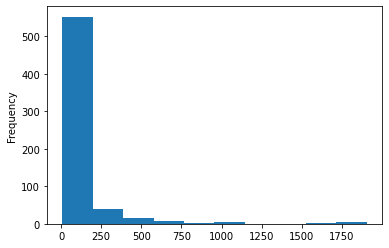

In [85]:
elevations2['change'] = elevations2['max'] - elevations2['min']
elevations2['change'].plot(kind='hist')

Over 550 of the 628 census tracts have an elevation change less than 200m. 

The plot shows that a large part of San Diego has a gentle slope. 

However, there are extreme areas with over 1,750m elevation change.

In [83]:
# final question
sd_df.iloc[elevations2['change'].idxmax()].NAME

'Census Tract 210, San Diego County, California'

# Credit

[Geographic Data Science with Python](https://geographicdata.science/book/intro.html)
*   Sergio J. Rey
*   Dani Arribas-Bel
*   Levi J. Wolf

